In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
#sari libraries are included by akshit

In [2]:
akshit = '\u0905\u0915\u094D\u0937\u093F\u0924'
kotnala = '\u0915\u094B\u091F\u0928\u093E\u0932\u093E'
print(akshit, kotnala)


अक्षित कोटनाला


In [3]:
#Data collection by akshit
v=  pd.read_csv("temperatures.csv")


In [4]:
v.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [5]:
v.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69


In [6]:
v.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [7]:
v.info


<bound method DataFrame.info of      YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN

In [8]:
v.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [9]:
# Data Wrangling
print("\nNull Values:\n", v.isnull().sum())


Null Values:
 YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64


In [10]:
# Remove rows with null values
data_cleaned = v

# Show the cleaned data
print("\nData after removing null values:\n", data_cleaned.head())


Data after removing null values:
    YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


In [11]:
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_data = v[monthly_columns]

In [12]:
# Standardizing the data before applying PCA by akshit
scaler = StandardScaler()
monthly_data_scaled = scaler.fit_transform(monthly_data)

# Applying PCA on the monthly data by akshit
pca = PCA(n_components=1)
monthly_pca = pca.fit_transform(monthly_data_scaled)

# Adding the PCA result as a new column to the original dataframe by akshit
v['MONTHLY_PCA'] = monthly_pca[:, 0]

In [13]:
# Drop the monthly columns (JAN to DEC) to prepare for correlation by akshit
data_for_corr = v.drop(columns=monthly_columns)

# Calculate the correlation matrix between the PCA component and other columns by akshit
correlation_matrix = data_for_corr.drop(columns=['MONTHLY_PCA']).corrwith(v['MONTHLY_PCA']).abs()

# Find the columns with the highest and second-highest correlation with the PCA component by akshit
input_feature_1 = correlation_matrix.idxmax()  # Feature with highest correlation

correlation_matrix = correlation_matrix.drop(input_feature_1)  # Remove the highest correlated feature

input_feature_2 = correlation_matrix.idxmax()  # Feature with second-highest correlation

correlation_matrix = correlation_matrix.drop(input_feature_2)  # Remove the second-highest correlated feature

input_feature_3 = correlation_matrix.idxmax()  # Feature with third-highest correlation

# Prepare the data for modeling with the highest correlated input feature
X_single = v[[input_feature_1]]
y = v['MONTHLY_PCA']

# Print the most correlated features
print("Feature with the highest correlation:", input_feature_1)

print("Feature with the second-highest correlation:", input_feature_2)

Feature with the highest correlation: ANNUAL
Feature with the second-highest correlation: OCT-DEC


In [14]:
v[[ input_feature_1, 'MONTHLY_PCA']].head()


,ANNUAL,MONTHLY_PCA
0,28.96,-0.689853
1,29.22,-0.428795
2,28.47,-2.710225
3,28.49,-3.380420
4,28.30,-2.093893


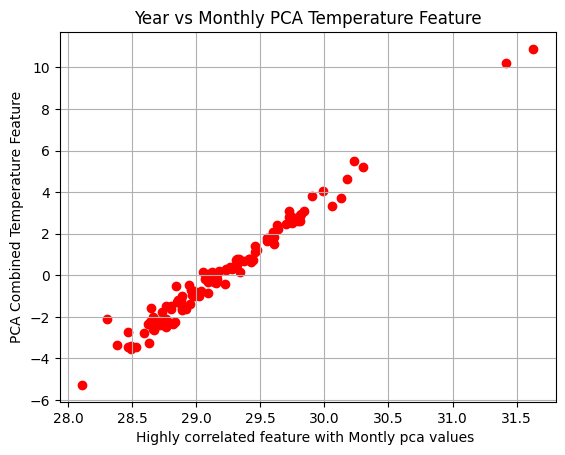

In [15]:
plt.scatter(v[ input_feature_1], v['MONTHLY_PCA'], label='Monthly PCA',color='red',marker='o');
plt.xlabel("Highly correlated feature with Montly pca values "); 
plt.ylabel("PCA Combined Temperature Feature");
plt.title("Year vs Monthly PCA Temperature Feature");
plt.grid(True)
plt.show()
#to show that model is linear in nature

In [16]:
x = v[[input_feature_1]]
y = v[['MONTHLY_PCA']]


In [17]:
# Lists to store SSE values
train_sse = []
test_sse = []
train_sizes = np.arange(0.1, 1.0, 0.1)  # Training sizes from 0.1 to 0.9 
# Loop to compute SSE (Sum of Squared Errors) for different training sizes
model_h = LinearRegression()  # akshit
for tr_size in train_sizes:  # Iterate over each training size (akshit)
    # Split the dataset into training and testing sets based on the current training size (akshit)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=tr_size, random_state=1)  # akshit
    
    # Initialize the Linear Regression model (akshit)
    #mod = LinearRegression()  # akshit
    # Fit the model using the training data (akshit)
    model_h.fit(x_train, y_train)  # akshit
    
    # Predict the target values for the training data (akshit)
    pred_train = model_h.predict(x_train)  # akshit
    # Predict the target values for the testing data (akshit)
    pred_test = model_h.predict(x_test)  # akshit
    
    # Calculate the Sum of Squared Errors for the training data (akshit)
    tr_sse = np.sum((pred_train - y_train)**2)  # akshit
    # Calculate the Sum of Squared Errors for the testing data (akshit)
    te_sse = np.sum((pred_test - y_test)**2)  # akshit
    
    # Append the training SSE to the list of training SSEs (akshit)
    train_sse.append(tr_sse)  # akshit
    # Append the testing SSE to the list of testing SSEs (akshit)
    test_sse.append(te_sse)  # akshit


C:\Users\akshi\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\akshi\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\akshi\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not

In [18]:
# Convert lists to arrays for analysis
train_sse = np.array(train_sse)
test_sse = np.array(test_sse)

# Compute the ratio of testing error to training error
error_ratio = test_sse / train_sse

# Find the index where the testing error is balanced with training error
# This index is where the error ratio is lowest but still with manageable training error
balanced_index = np.argmin(np.abs(error_ratio - np.min(error_ratio)))

optimal_train_size = train_sizes[balanced_index]


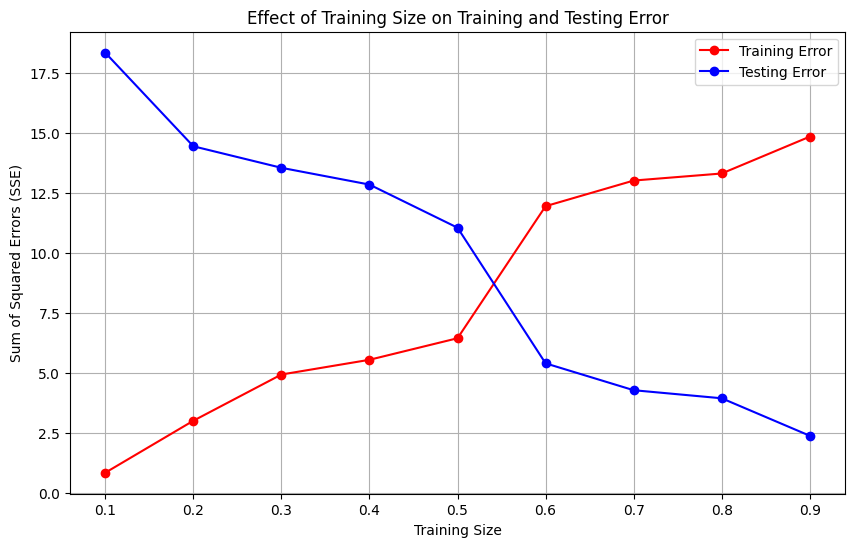

In [19]:
# Plot the SSE against the training size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_sse, 'r-o', label="Training Error")
plt.plot(train_sizes, test_sse, 'b-o', label="Testing Error")
plt.grid(True)
plt.xlabel("Training Size")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Effect of Training Size on Training and Testing Error")
plt.legend()
plt.show()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-optimal_train_size, random_state=1)


In [21]:
# Check the shapes of the training and testing data
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (105, 1)
x_test.shape: (12, 1)
y_train.shape: (105, 1)
y_test.shape: (12, 1)


In [37]:
# Fit the Linear Regression model
model_h.fit(x_train, y_train)

LinearRegression()

In [23]:
# Predict on the training and testing sets
train_predicted = model_h.predict(x_train)
test_predicted = model_h.predict(x_test)

In [24]:
# Calculate Sum of Squared Errors (SSE) for the training set
train_sse = np.sum((train_predicted - y_train)**2, axis=0)
print("Training SSE:", train_sse)


Training SSE: MONTHLY_PCA    14.854181
dtype: float64


In [25]:
# Calculate MAE, MSE, and R² for the training set
mae_train = round(mean_absolute_error(y_train, train_predicted), 2)
mse_train = round(mean_squared_error(y_train, train_predicted), 2)
r2_train = round(r2_score(y_train, train_predicted), 2)

# Print training results
print("Training Mean Absolute Error (MAE):", mae_train)
print("Training Mean Squared Error (MSE):", mse_train)
print("Training R-squared (R²):", r2_train)

# Calculate SSE for the training set
train_sse = np.sum((train_predicted - y_train) ** 2)
print("Training SSE:", train_sse)

# Calculate MAE, MSE, and R² for the testing set
mae_test = round(mean_absolute_error(y_test, test_predicted), 2)
mse_test = round(mean_squared_error(y_test, test_predicted), 2)
r2_test = round(r2_score(y_test, test_predicted), 2)

# Print testing results
print("Testing Mean Absolute Error (MAE):", mae_test)
print("Testing Mean Squared Error (MSE):", mse_test)
print("Testing R-squared (R²):", r2_test)

# Calculate SSE for the testing set
test_sse = np.sum((test_predicted - y_test) ** 2)
print("Testing SSE:", test_sse)

Training Mean Absolute Error (MAE): 0.28
Training Mean Squared Error (MSE): 0.14
Training R-squared (R²): 0.98
Training SSE: MONTHLY_PCA    14.854181
dtype: float64
Testing Mean Absolute Error (MAE): 0.32
Testing Mean Squared Error (MSE): 0.2
Testing R-squared (R²): 0.92
Testing SSE: MONTHLY_PCA    2.386925
dtype: float64


C:\Users\akshi\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\akshi\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


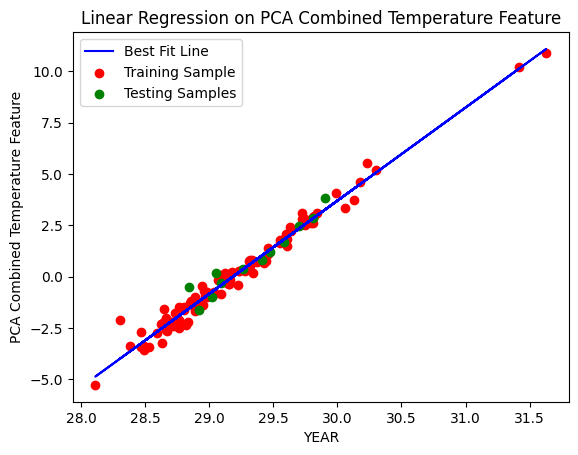

In [26]:
# Plot the results
plt.plot(x_train, train_predicted, c='b')
plt.scatter(x_train, y_train, c='r')
plt.scatter(x_test, y_test, c='g')
plt.legend(["Best Fit Line", "Training Sample", "Testing Samples"])
plt.xlabel("YEAR")
plt.ylabel("PCA Combined Temperature Feature")
plt.title("Linear Regression on PCA Combined Temperature Feature")
plt.show()

In [27]:
v.corr()["MONTHLY_PCA"].sort_values(ascending=False)

MONTHLY_PCA    1.000000
ANNUAL         0.988512
OCT-DEC        0.917755
JUN-SEP        0.859390
NOV            0.851729
DEC            0.848124
OCT            0.812615
MAR-MAY        0.810007
JAN-FEB        0.802486
AUG            0.798449
YEAR           0.796998
SEP            0.772477
FEB            0.743128
APR            0.732701
JAN            0.718147
JUL            0.653251
MAR            0.633258
MAY            0.617345
JUN            0.538081
Name: MONTHLY_PCA, dtype: float64

In [28]:

from mpl_toolkits.mplot3d import Axes3D

In [29]:
features = [input_feature_2, input_feature_3, input_feature_1]
X = v[features]
y = v['MONTHLY_PCA']

train_sse = []
test_sse = []

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-optimal_train_size, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [34]:
# Select two input features for 3D modeling (akshit)
X_double = data_cleaned[[input_feature_1, input_feature_2]]  # akshit

# Split the data into training and testing sets (akshit)
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_double, y, train_size=0.8, random_state=42)  # akshit

# Train the Linear Regression model on the training data (akshit)
model.fit(X_train_3d, y_train_3d)  # akshit

# Create a meshgrid for the 3D plot using the range of training data (akshit)
x_surf, y_surf = np.meshgrid(np.linspace(X_train_3d[input_feature_1].min(), X_train_3d[input_feature_1].max(), 100),
                             np.linspace(X_train_3d[input_feature_2].min(), X_train_3d[input_feature_2].max(), 100))  # akshit

# Predict the values for the regression plane (akshit)
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T)  # akshit
# Reshape the predicted values to match the grid shape (akshit)
z_surf = z_surf.reshape(x_surf.shape)  # akshit


C:\Users\akshi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


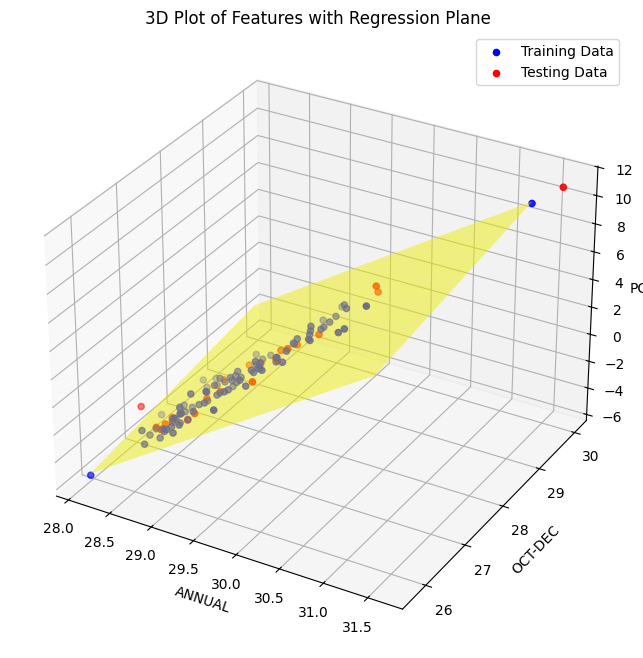

In [35]:
# Create a 3D figure for plotting (akshit)
fig = plt.figure(figsize=(12, 8))  # akshit
ax = fig.add_subplot(111, projection='3d')  # akshit

# Plot training data points (akshit)
ax.scatter(X_train_3d[input_feature_1], X_train_3d[input_feature_2], y_train_3d, color='blue', label='Training Data')  # akshit
# Plot testing data points (akshit)
ax.scatter(X_test_3d[input_feature_1], X_test_3d[input_feature_2], y_test_3d, color='red', label='Testing Data')  # akshit

# Plot the regression plane (akshit)
ax.plot_surface(x_surf, y_surf, z_surf, color='yellow', alpha=0.5)  # akshit

# Set axis labels (akshit)
ax.set_xlabel(input_feature_1)  # akshit
ax.set_ylabel(input_feature_2)  # akshit
ax.set_zlabel('PCA1')  # akshit
ax.set_title('3D Plot of Features with Regression Plane')  # akshit
ax.legend()  # Show legend (akshit)

plt.show()  # Display the plot (akshit)


In [36]:
thank_you = '\u0927\u0928\u094D\u092F\u093E\u0935\u093E\u0928'
print(thank_you)


धन्यावान
